In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_column", None)
pd.set_option("display.max_rows", None) 

In [9]:
data = pd.read_csv("Amazon Sale Report.csv")
dff = pd.DataFrame(data)
df = dff.copy()

C:\Users\nikuj\AppData\Local\Temp\ipykernel_18164\3302681284.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Amazon Sale Report.csv")


In [10]:
df.head(1)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN


In [11]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [12]:
# Dropping unuseful columns

df = df.drop(columns = {"index","ASIN","Unnamed: 22"})

In [13]:
# Duplicate rows

dup_row_cnt = df[df.duplicated()].shape

print(dup_row_cnt)

df[df.duplicated(keep = False)]

(6, 21)


,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
30660,406-0372545-6086735,04-12-22,Cancelled,Amazon,Amazon.in,Expedited,SET197,SET197-KR-NP-L,Set,L,Cancelled,0,NaN,NaN,Siliguri,WEST BENGAL,734008.0,IN,NaN,False,NaN
30661,406-0372545-6086735,04-12-22,Cancelled,Amazon,Amazon.in,Expedited,SET197,SET197-KR-NP-L,Set,L,Cancelled,0,NaN,NaN,Siliguri,WEST BENGAL,734008.0,IN,NaN,False,NaN
41291,408-0373839-4433120,04-05-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3501,JNE3501-KR-M,kurta,M,Cancelled,0,NaN,NaN,BENGALURU,KARNATAKA,560072.0,IN,NaN,False,NaN
41292,408-0373839-4433120,04-05-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3501,JNE3501-KR-M,kurta,M,Cancelled,0,NaN,NaN,BENGALURU,KARNATAKA,560072.0,IN,NaN,False,NaN
79844,171-9628368-5329958,05-07-22,Cancelled,Amazon,Amazon.in,Expedited,J0329,J0329-KR-L,kurta,L,Cancelled,0,NaN,NaN,ERNAKULAM,KERALA,682017.0,IN,NaN,False,NaN
79845,171-9628368-5329958,05-07-22,Cancelled,Amazon,Amazon.in,Expedited,J0329,J0329-KR-L,kurta,L,Cancelled,0,NaN,NaN,ERNAKULAM,KERALA,682017.0,IN,NaN,False,NaN
85790,171-3249942-2207542,05-03-22,Shipped,Amazon,Amazon.in,Expedited,SET323,SET323-KR-NP-XL,Set,XL,Shipped,1,INR,939.0,PUNE,MAHARASHTRA,411057.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
85791,171-3249942-2207542,05-03-22,Shipped,Amazon,Amazon.in,Expedited,SET323,SET323-KR-NP-XL,Set,XL,Shipped,1,INR,939.0,PUNE,MAHARASHTRA,411057.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
86418,405-8669298-3850736,05-03-22,Shipped,Amazon,Amazon.in,Expedited,MEN5025,MEN5025-KR-XXXL,kurta,3XL,Shipped,1,INR,533.0,GHAZIABAD,UTTAR PRADESH,201010.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
86419,405-8669298-3850736,05-03-22,Shipped,Amazon,Amazon.in,Expedited,MEN5025,MEN5025-KR-XXXL,kurta,3XL,Shipped,1,INR,533.0,GHAZIABAD,UTTAR PRADESH,201010.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN


### There are some duplicated rows, lets fix them

In [14]:
df = df.drop_duplicates()

In [15]:
df.head(2)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship


In [16]:
# let's check dtypes and null counts

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128969 entries, 0 to 128974
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128969 non-null  object 
 1   Date                128969 non-null  object 
 2   Status              128969 non-null  object 
 3   Fulfilment          128969 non-null  object 
 4   Sales Channel       128969 non-null  object 
 5   ship-service-level  128969 non-null  object 
 6   Style               128969 non-null  object 
 7   SKU                 128969 non-null  object 
 8   Category            128969 non-null  object 
 9   Size                128969 non-null  object 
 10  Courier Status      122097 non-null  object 
 11  Qty                 128969 non-null  int64  
 12  currency            121177 non-null  object 
 13  Amount              121177 non-null  float64
 14  ship-city           128936 non-null  object 
 15  ship-state          128936 non-null  ob

### Mostly columns already have correct dtype let's fix them and null values

In [17]:
df["Date"] = pd.to_datetime(df["Date"])

C:\Users\nikuj\AppData\Local\Temp\ipykernel_18164\936118274.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


In [18]:
# lets see how many nulls each columns have

null_cnt = df.isnull().sum()
null_cnt[null_cnt > 0].sort_values(ascending = False)

fulfilled-by        89692
promotion-ids       49150
currency             7792
Amount               7792
Courier Status       6872
ship-state             33
ship-city              33
ship-country           33
ship-postal-code       33
dtype: int64

In [19]:
# lets replace null values of some columns as "unknown":

un_columns = ["fulfilled-by","promotion-ids","currency","Courier Status"]
for col in un_columns:
    df[col] = df[col].fillna("Unknown")

In [20]:
# lets replace null values of some columns using ffill because they have very smalll amount of nulls:

fill_col = ["ship-city","ship-state","ship-postal-code","ship-country"]
for col in fill_col:
    df[col] = df[col].fillna(method = "ffill")

C:\Users\nikuj\AppData\Local\Temp\ipykernel_18164\857568356.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method = "ffill")


In [21]:
# Let's fix amount column nulls:

df["Amount"] = df["Amount"].interpolate(method = "linear", limit_direction = "both")


In [22]:
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by'],
      dtype='object')

In [23]:
# Let's check if there any mistyped value in data

ob_col = ["Status","Fulfilment","Sales Channel ","ship-service-level","Style","SKU","Category","Size"
          ,"Courier Status","currency","ship-city","ship-state","ship-country","promotion-ids","B2B","fulfilled-by"]
for i in ob_col:
    print(f"Value Counts in column {i}")
    value_counts = df[i].value_counts().to_frame(name = "count")
    print(value_counts)
    print("="*50)
    print(" " *50)

Value Counts in column Status
                               count
Status                              
Shipped                        77801
Shipped - Delivered to Buyer   28769
Cancelled                      18329
Shipped - Returned to Seller    1953
Shipped - Picked Up              973
Pending                          658
Pending - Waiting for Pick Up    281
Shipped - Returning to Seller    145
Shipped - Out for Delivery        35
Shipped - Rejected by Buyer       11
Shipping                           8
Shipped - Lost in Transit          5
Shipped - Damaged                  1
                                                  
Value Counts in column Fulfilment
            count
Fulfilment       
Amazon      89692
Merchant    39277
                                                  
Value Counts in column Sales Channel 
                 count
Sales Channel         
Amazon.in       128845
Non-Amazon         124
                                                  
Value Counts in column shi

### There are some misstyped value in ship-state column

In [90]:
# Let's fix ship_state column
df["ship-state"] = df["ship-state"].str.strip()

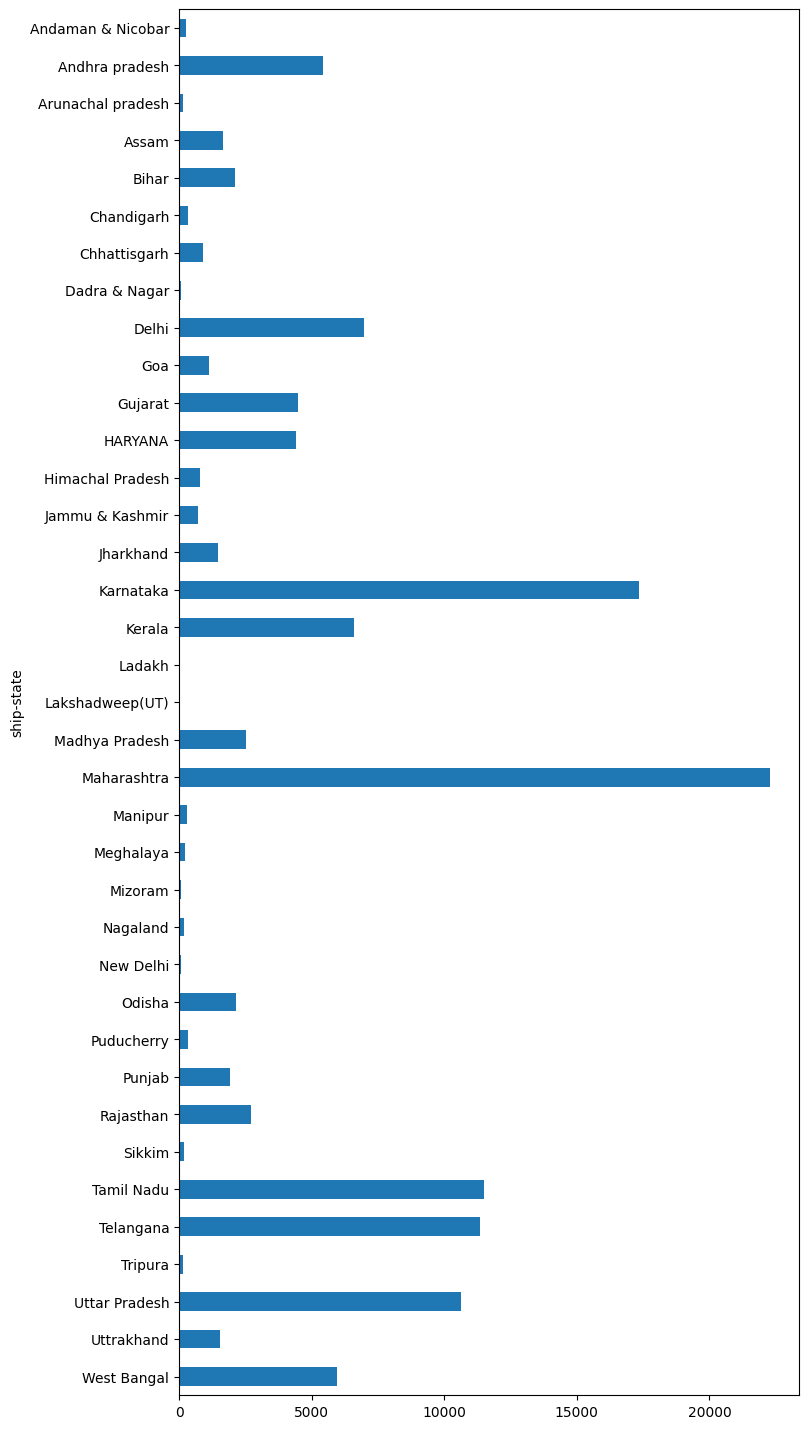

In [94]:
# Plotting values in barh graph for detailed view

plt.figure(figsize = (8,18))
df["ship-state"].value_counts().sort_index(ascending = False).plot(kind = 'barh')
plt.show()

In [92]:
# replacing value with correct value

mapping = {
    "Punjab/Mohali/Zirakpur" : "Punjab",
    "LAKSHADWEEP" : "Lakshadweep",
    "Lakshadweep" : "Lakshadweep(UT)",
    "KERALA" : "Kerala",
    "LADAKH" : "Ladakh",
    "DADRA AND NAGAR" : "Dadra & Nagar",
    "ANDHRA PRADESH" : "Andhra pradesh",
    "ASSAM" : "Assam",
    "ARUNACHAL PRADESH": "Arunachal pradesh",
    "Arunachal Pradesh": "Arunachal pradesh",
    "ARUNACHAL PRADESH": "Arunachal pradesh",
    "Arunachal pradesh": "Arunachal pradesh",
    "APO" : " Arunachal pradesh",
    "CHHATTISGARH" : "Chhattisgarh",
    "MAHARASHTRA": "Maharashtra",
    "KARNATAKA": "Karnataka",
    "TAMIL NADU": "Tamil Nadu",
    "TELANGANA": "Telangana",
    "UTTAR PRADESH": "Uttar Pradesh",
    "delhi": "Delhi",
    "DELHI": "Delhi",
    "Dehli": "Delhi",
    "punjab": "Punjab",
    "PUNJAB": "Punjab",
    "PB" : "Punjab",
    "Pondicherry" : "Puducherry",
    "bihar": "Bihar",
    "BIHAR": "Bihar",
    "goa" : "Goa",
    "GOA" : "Goa",
    "JAMMU & KASHMIR" : "Jammu & Kashmir",
    "RAJASTHAN": "Rajasthan",
    "Rajshthan": "Rajasthan",
    "Rajsthan": "Rajasthan",
    "RJ": "Rajasthan",
    "rajasthan": "Rajasthan",
    "rajsthan" : "Rajasthan",
    "odisha": "Odisha",
    "ORISSA": "Odisha",
    "orissa": "Odisha",
    "orrisa": "Odisha",
    "CHANDIGARH": "Chandigarh",
    "chandigarh": "Chandigarh",
    "PUDUCHERRY": "Puducherry",
    "puducherry": "Puducherry",
    "ODISHA" : "Odisha",
    "Orissa" : "Odisha",
    "MEGHALAYA": "Meghalaya",
    "meghalaya": "Meghalaya",
    "MANIPUR" : "Manipur",
    "MEGHALAYA" : "Meghalaya",
    "MIZORAM" : "Mizoram",
    "NAGALAND": "Nagaland",
    "NL" : "Nagaland", 
    "nagaland": "Nagaland",
    "SIKKIM": "Sikkim",
    "sikkim": "Sikkim",
    "TRIPURA" : "Tripura",
    "WEST BENGAL" : "West Bangal",
    "UTTARAKHAND" : "Uttrakhand",
    "MADHYA PRADESH" : "Madhya Pradesh",
    "JHARKHAND" : "Jharkhand",
    "HIMACHAL PRADESH" : "Himachal Pradesh",
    "ANDAMAN & NICOBAR" : "Andaman & Nicobar"
}

df["ship-state"] =  df["ship-state"].replace(mapping)


In [96]:
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by'],
      dtype='object')

### There are many misstyped value in ship city too let's fix them

In [138]:
df["ship-city-new-address"] = (
    df["ship-city"]
    .str.split(" ")
    .str[:2]
    .str.join(" ")
    .str.upper()
    .str.strip()
)

In [140]:
df["ship-city-new-address"] = df["ship-city-new-address"].str.replace(r'[^A-Za-z0-9 ]', '', regex=True)

In [143]:
df.head(3)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,ship-city-new-address
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,Unknown,0,INR,647.62,MUMBAI,Maharashtra,400081.0,IN,Unknown,False,Easy Ship,MUMBAI
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,Shipped,1,INR,406.00,BENGALURU,Karnataka,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,BENGALURU
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,Shipped,1,INR,329.00,NAVI MUMBAI,Maharashtra,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Unknown,NAVI MUMBAI


<Axes: ylabel='Amount'>

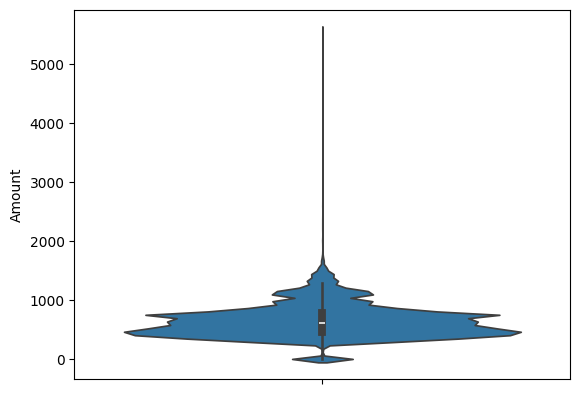

In [26]:
# Let's see how data in Amount column is distributed

sns.violinplot(df["Amount"])

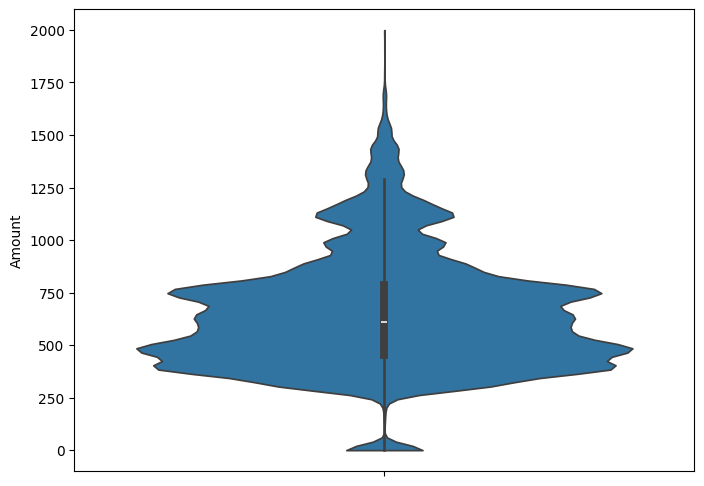

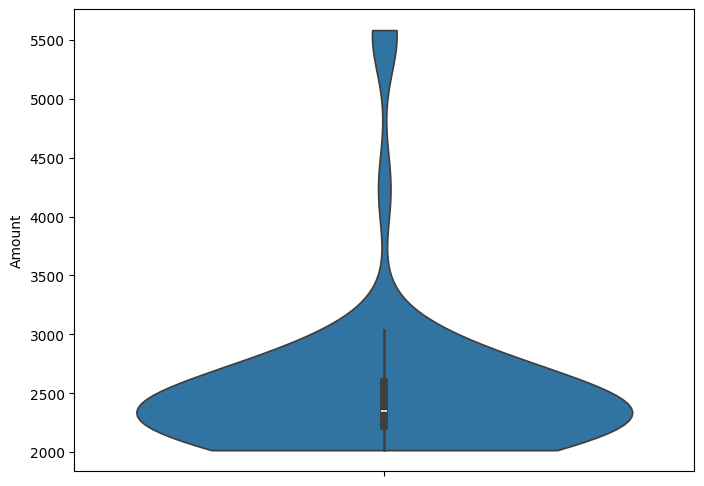

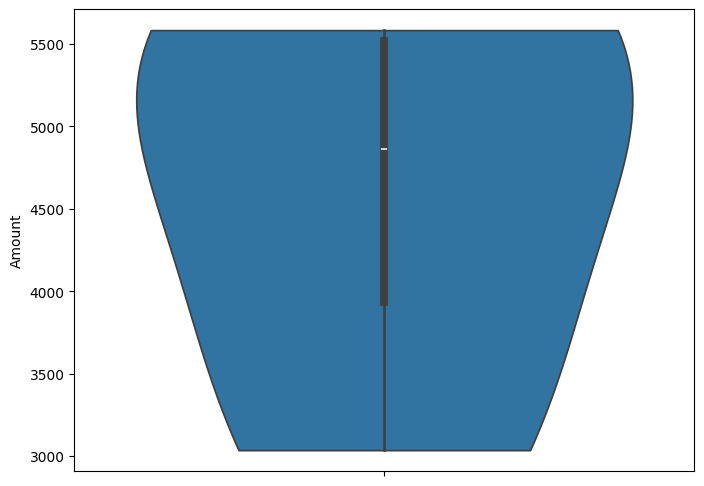

In [27]:
# For detailed distribution of data in Amount column

df_lessthan_2000 = df[df["Amount"] <2000]
df_greaterthan_2000 = df[df["Amount"] >2000]
df_greaterthan_3000 = df[df["Amount"] >3000]


violin_graph_data = [df_lessthan_2000,df_greaterthan_2000,df_greaterthan_3000]
for data in violin_graph_data:
    plt.figure(figsize = (8,6))
    sns.violinplot(data["Amount"],cut=0)
    plt.show()

In [28]:

df[df["Amount"] > 2000].shape


(54, 21)

In [29]:
df[df["Amount"] < 2000].shape

(128915, 21)

### When I was analyzing spread of Amount data, I found some insights:-
### There are only 54 person who purchased > 2000 & There are 1.2 lakh people who purchased < 2000 

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128969 entries, 0 to 128974
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128969 non-null  object        
 1   Date                128969 non-null  datetime64[ns]
 2   Status              128969 non-null  object        
 3   Fulfilment          128969 non-null  object        
 4   Sales Channel       128969 non-null  object        
 5   ship-service-level  128969 non-null  object        
 6   Style               128969 non-null  object        
 7   SKU                 128969 non-null  object        
 8   Category            128969 non-null  object        
 9   Size                128969 non-null  object        
 10  Courier Status      128969 non-null  object        
 11  Qty                 128969 non-null  int64         
 12  currency            128969 non-null  object        
 13  Amount              128969 non-nul

In [31]:
object_cols = df.select_dtypes(include = 'object').columns
for col in object_cols:
    df[col] = df[col].str.strip()

In [146]:
filtered_df = df[df["Amount"] > 2000]
filtered_df.to_csv("High_Value_Customer.csv",index = False)

In [147]:
filter_df = df[df["Amount"] < 2000]
filter_df.to_csv("Online_Sales_Dataset.csv",index = False)